<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [ ]:
## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


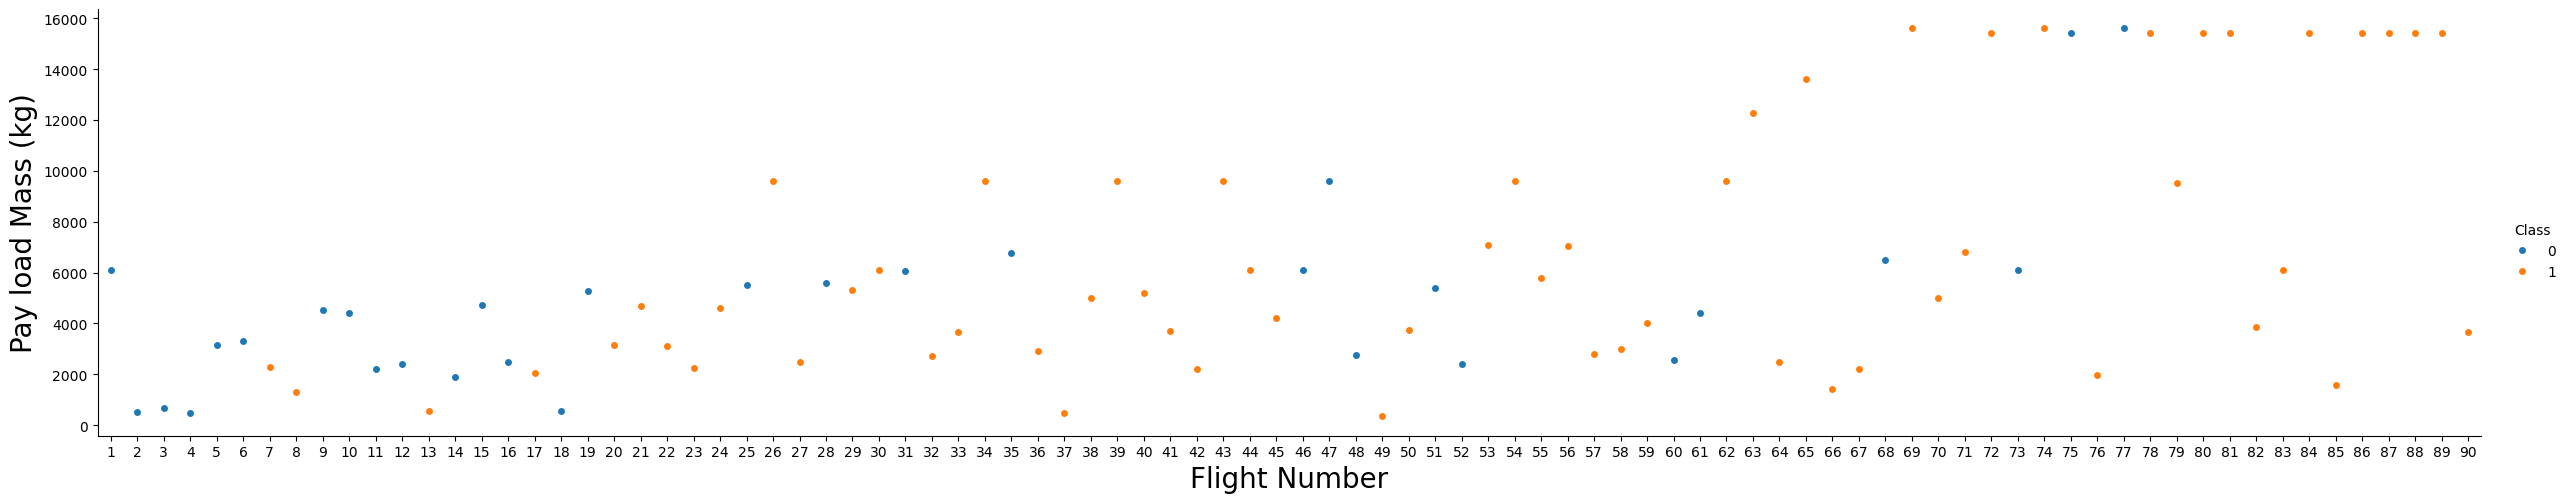

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


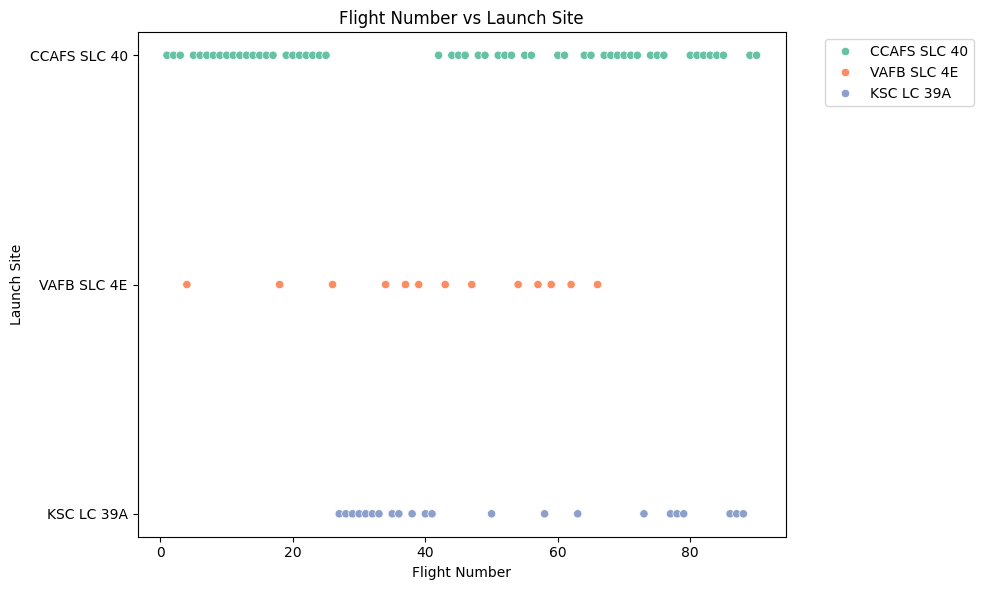

In [5]:
### TASK 1: Visualize the relationship between Flight Number and Launch Site
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(data=df, x='FlightNumber', y='LaunchSite', hue='class', palette='Set2')

# Set title and labels
plt.title('Flight Number vs Launch Site')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')

# Show plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()
plt.show()

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


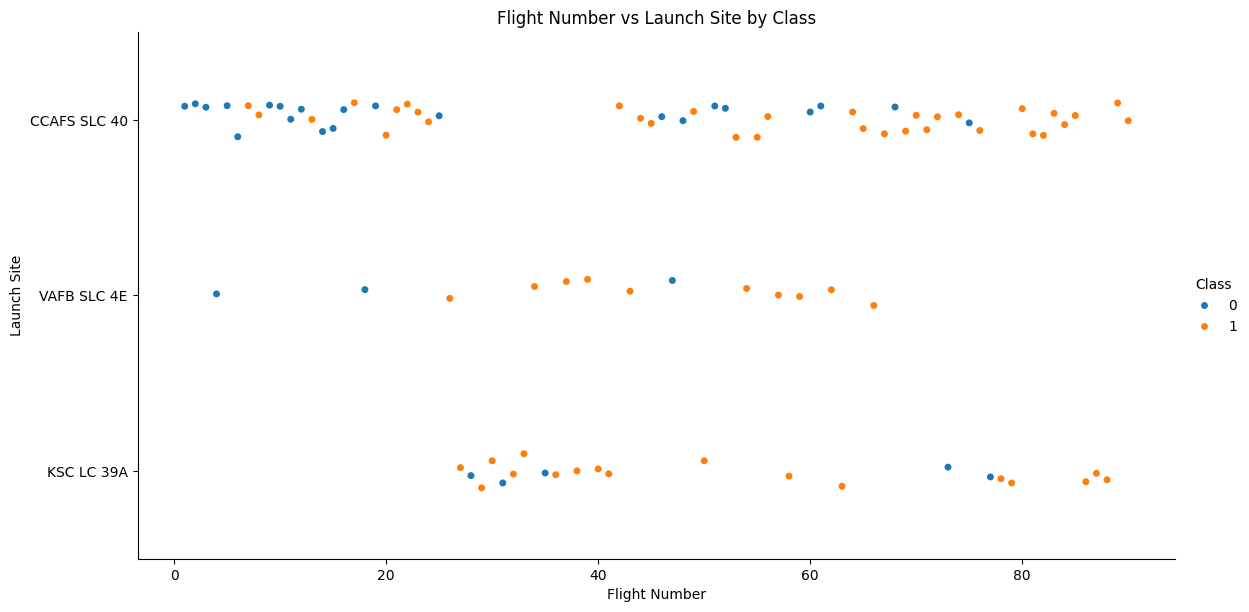

In [6]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
# Create the catplot
sns.catplot(data=df, x='FlightNumber', y='LaunchSite', hue='Class', kind='strip', height=6, aspect=2)

# Set title and labels
plt.title('Flight Number vs Launch Site by Class')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')

# Show plot
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


In [ ]:
### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


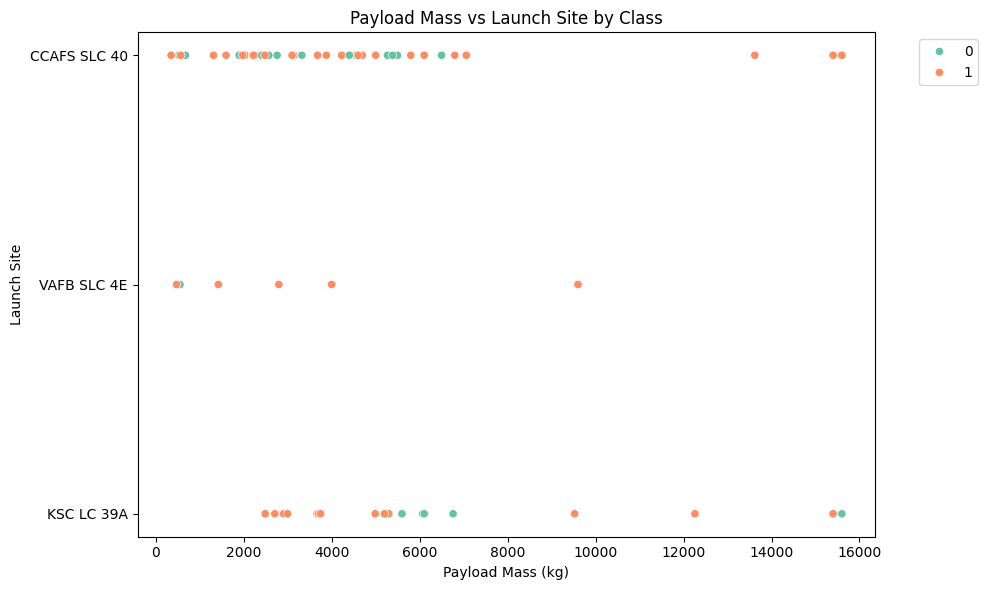

In [7]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(data=df, x='PayloadMass', y='LaunchSite', hue='Class', palette='Set2')

# Set title and labels
plt.title('Payload Mass vs Launch Site by Class')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')

# Show plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


In [ ]:
### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


<ipython-input-8-d014c7cc2e4f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=orbit_success_rate, x='Orbit', y='Class', palette='viridis')


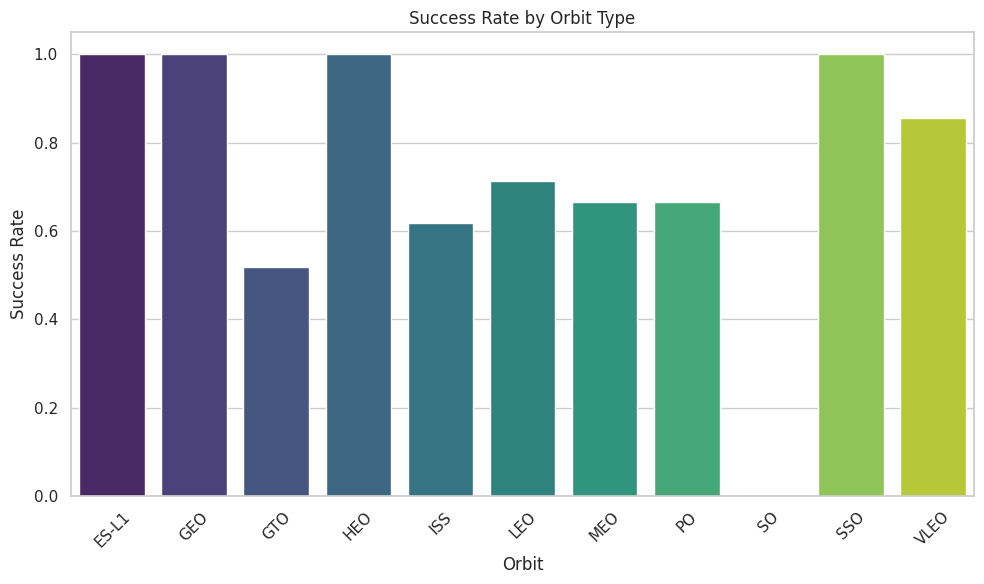

In [8]:
# HINT use groupby method on Orbit column and get the mean of Class column
# Calculate the success rate for each orbit type
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# Set the style of the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=orbit_success_rate, x='Orbit', y='Class', palette='viridis')

# Set title and labels
plt.title('Success Rate by Orbit Type')
plt.xlabel('Orbit')
plt.ylabel('Success Rate')

# Show plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Analyze the ploted bar chart try to find which orbits have high sucess rate.


In [ ]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


In [ ]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


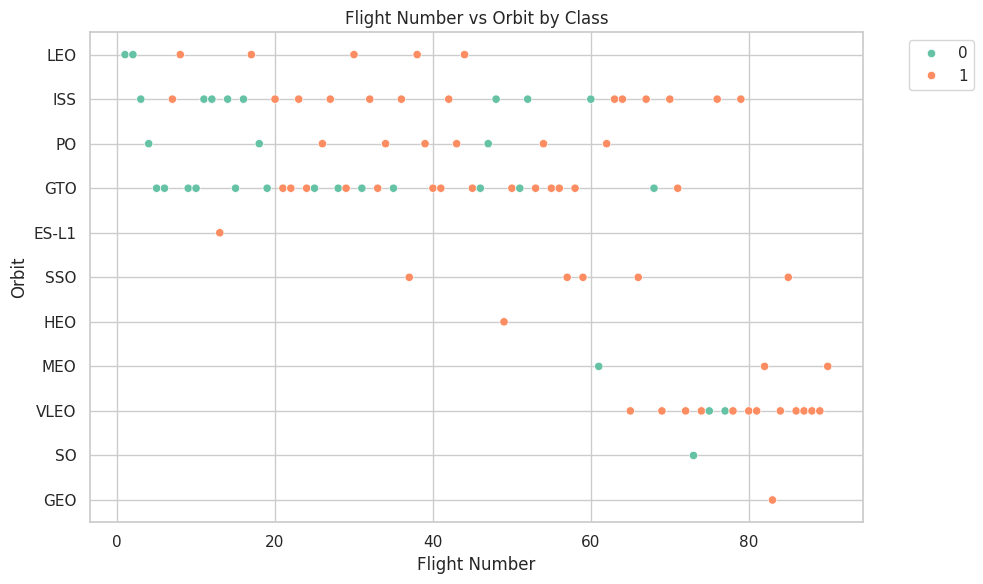

In [9]:
### TASK  5: Visualize the relationship between Payload and Orbit type
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a scatter plot
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Class', palette='Set2')

# Set title and labels
plt.title('Flight Number vs Orbit by Class')
plt.xlabel('Flight Number')
plt.ylabel('Orbit')

# Show plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()
plt.show()

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


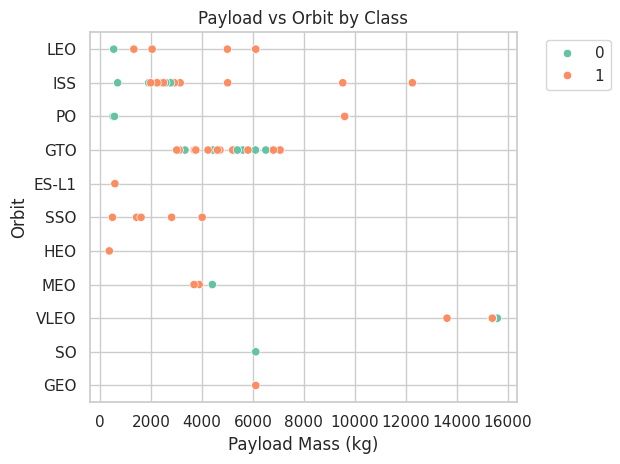

In [10]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
# Create a scatter plot
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='Class', palette='Set2')

# Set title and labels
plt.title('Payload vs Orbit by Class')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit')

# Show plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


In [ ]:
### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [11]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


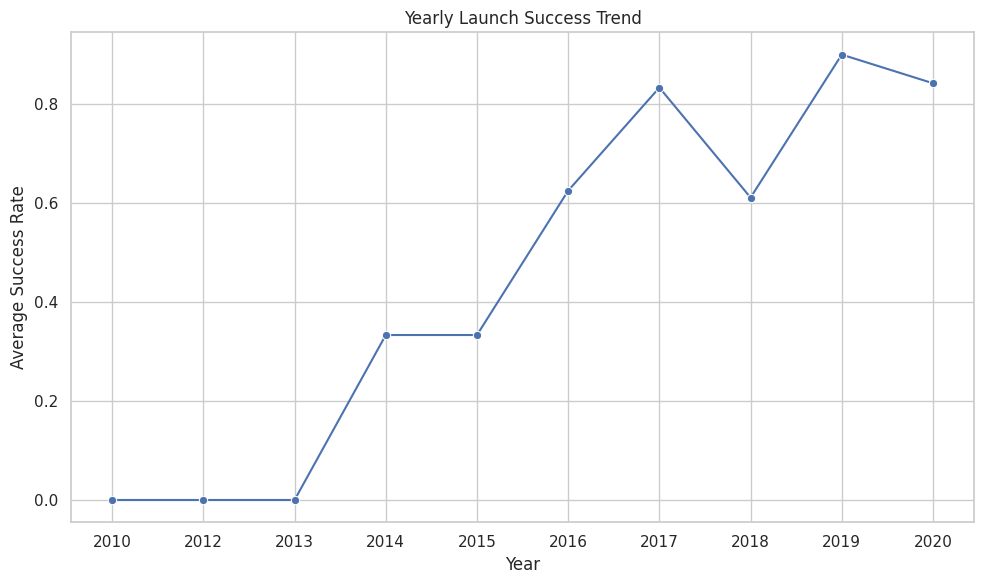

In [13]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
# Calculate the average success rate for each year
yearly_success_rate = df.groupby('Date')['Class'].mean().reset_index()

# Set the style of the plot
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_success_rate, x='Date', y='Class', marker='o')

# Set title and labels
plt.title('Yearly Launch Success Trend')
plt.xlabel('Year')
plt.ylabel('Average Success Rate')

# Show plot
plt.tight_layout()
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020


In [ ]:
## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [14]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [ ]:
### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [17]:
# HINT: Use get_dummies() function on the categorical columns
# List of columns to apply OneHotEncoder
columns_to_encode = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Apply OneHotEncoder using get_dummies
features_one_hot = pd.get_dummies(features, columns=columns_to_encode)

# Display the encoded DataFrame
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [18]:
# HINT: use astype function
# Cast all numeric columns to float64
features_encoded = features_encoded.astype(float)

# Display the resulting DataFrame
features_encoded.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


## Zusatzfragen:

In [21]:
# Find the names of the unique launch sites
unique_launch_sites = df['LaunchSite'].unique()

# Display the unique launch site names
print(unique_launch_sites)

['CCAFS SLC 40' 'VAFB SLC 4E' 'KSC LC 39A']


In [24]:
# Find 5 records where launch sites begin with 'CCA'
records_with_CCA = df[df['LaunchSite'].str.startswith('CCA')].head(5)

# Display the records
print(records_with_CCA)

   FlightNumber  Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013       Falcon 9   677.000000   ISS  CCAFS SLC 40   
4             5  2013       Falcon 9  3170.000000   GTO  CCAFS SLC 40   
5             6  2014       Falcon 9  3325.000000   GTO  CCAFS SLC 40   

     Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  ReusedCount  \
0  None None        1     False   False  False        NaN    1.0            0   
1  None None        1     False   False  False        NaN    1.0            0   
2  None None        1     False   False  False        NaN    1.0            0   
4  None None        1     False   False  False        NaN    1.0            0   
5  None None        1     False   False  False        NaN    1.0            0   

  Serial  Longitude   Latitude  Class  
0  B0003 -80.577366  28.561857    

<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


In [25]:
# Calculate the total payload mass
total_payload_mass = df['PayloadMass'].sum()

# Display the total payload mass
print("Total payload mass:", total_payload_mass, "kg")

Total payload mass: 549446.3470588236 kg


In [27]:
average_payload_mass_f9_v1_1 = df.loc[df['BoosterVersion'] == 'Falcon 9', 'PayloadMass'].mean()

# Display the average payload mass carried by booster version F9 v1.1
print("Average payload mass carried by booster version F9 v1.1:", average_payload_mass_f9_v1_1, "kg")

Average payload mass carried by booster version F9 v1.1: 6104.959411764707 kg


In [33]:
df.head(100)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1


In [36]:
# Filter the DataFrame to include only successful landings with Class value '1'
successful_ground_pad_landings = df[(df['Class'] == 1) & (df['LandingPad'].notnull())]

# Sort the DataFrame by date
successful_ground_pad_landings_sorted = successful_ground_pad_landings.sort_values(by='Date')

# Select the date of the first successful landing outcome on a ground pad
first_successful_ground_pad_landing_date = successful_ground_pad_landings_sorted.iloc[0]['Date']

# Display the date of the first successful landing outcome on a ground pad
print("Year of the first successful landing outcome on a ground pad:", first_successful_ground_pad_landing_date)

Year of the first successful landing outcome on a ground pad: 2015


In [40]:
# Find the names of the unique launch sites
unique_outcomes = df['Outcome'].unique()

# Display the unique launch site names
print(unique_outcomes)

['None None' 'False Ocean' 'True Ocean' 'False ASDS' 'None ASDS'
 'True RTLS' 'True ASDS' 'False RTLS']


In [41]:
# Filter the DataFrame based on the conditions
filtered_boosters = df[(df['Class'] ==1) & 
                       (df['Outcome'].str.contains('True Ocean', case=False)) & 
                       (df['PayloadMass'] > 4000) & 
                       (df['PayloadMass'] < 6000)]

# List the names of boosters meeting the conditions
boosters_names = filtered_boosters['BoosterVersion'].unique()

# Display the names of boosters
print("Names of boosters meeting the conditions:")
for name in boosters_names:
    print(name)

Names of boosters meeting the conditions:
Falcon 9


In [43]:
# Calculate the total number of successful and failed mission outcomes
outcome_counts = df['Class'].value_counts()

# Display the outcome counts
print("Total number of successful mission outcomes:", outcome_counts[1])
print("Total number of failed mission outcomes:", outcome_counts[0])

Total number of successful mission outcomes: 60
Total number of failed mission outcomes: 30


In [44]:
# Find the maximum payload mass
max_payload_mass = df['PayloadMass'].max()

# Filter the DataFrame to include only records with the maximum payload mass
boosters_with_max_payload = df[df['PayloadMass'] == max_payload_mass]

# List the names of boosters carrying the maximum payload mass
boosters_names = boosters_with_max_payload['BoosterVersion'].unique()

# Display the names of boosters carrying the maximum payload mass
print("Booster(s) carrying the maximum payload mass:")
for name in boosters_names:
    print(name)

Booster(s) carrying the maximum payload mass:
Falcon 9


In [48]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter the DataFrame for the year 2015
df_2015 = df[df['Date'].dt.year == 2015]

# Filter the DataFrame for failed landing outcomes on a drone ship
failed_landing_drone_ship = df_2015[(df_2015['Class'] == 0)]

# Display the failed landing outcomes, their booster versions, and launch site names
print("Failed landing outcomes on a drone ship in 2015:")
for index, row in failed_landing_drone_ship.iterrows():
    print("Launch Site:", row['LaunchSite'])
    print("Booster Version:", row['BoosterVersion'])
    print("Landing Outcome:", row['Outcome'])
    print()

Failed landing outcomes on a drone ship in 2015:
Launch Site: CCAFS SLC 40
Booster Version: Falcon 9
Landing Outcome: False ASDS

Launch Site: CCAFS SLC 40
Booster Version: Falcon 9
Landing Outcome: False ASDS

Launch Site: CCAFS SLC 40
Booster Version: Falcon 9
Landing Outcome: None None

Launch Site: CCAFS SLC 40
Booster Version: Falcon 9
Landing Outcome: None ASDS



In [49]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter the DataFrame for the specified date range
filtered_df = df[(df['Date'] >= '2010-06-04') & (df['Date'] <= '2017-03-20')]

# Count the occurrences of each landing outcome
landing_outcomes_counts = filtered_df['Outcome'].value_counts()

# Display the ranked count of landing outcomes in descending order
print("Ranked count of landing outcomes between 2010-06-04 and 2017-03-20:")
print(landing_outcomes_counts)

Ranked count of landing outcomes between 2010-06-04 and 2017-03-20:
True ASDS      12
None None      10
True RTLS       8
True Ocean      4
False ASDS      4
False Ocean     2
None ASDS       2
Name: Outcome, dtype: int64


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
